## Coherence Analysis

In [11]:
import os
import sys

import gdal
%matplotlib inline
import matplotlib.pyplot as plt
import numpy

sys.path.append('/opt/OTB/lib/python')
sys.path.append('/opt/OTB/lib/libfftw3.so.3')
os.environ['OTB_APPLICATION_PATH'] = '/opt/OTB/lib/otb/applications'
os.environ['LD_LIBRARY_PATH'] = '/opt/OTB/lib'
os.environ['ITK_AUTOLOAD_PATH'] = '/opt/OTB/lib/otb/applications'
import otbApplication
from scipy import stats


In [2]:
coherence_prds = ['coh_13547_13372_ortho.tiff',
                 'coh_13722_13547_ortho.tiff']

OTB_app1 = otbApplication.Registry.CreateApplication("ConcatenateImages")    

OTB_app1.SetParameterStringList("il", coherence_prds)
OTB_app1.SetParameterString('out', 'concat.tif')

OTB_app1.ExecuteAndWriteOutput()


0

In [3]:
BandMath = otbApplication.Registry.CreateApplication("BandMath")

# The following lines set all the application parameters:
BandMath.SetParameterStringList("il", ['concat.tif'])

BandMath.SetParameterString("out", "d_coherence.tif")

BandMath.SetParameterString("exp", "( im1b1 - im1b2 ) /( im1b1 +im1b2 ) ")

# The following line execute the application
BandMath.ExecuteAndWriteOutput()

0

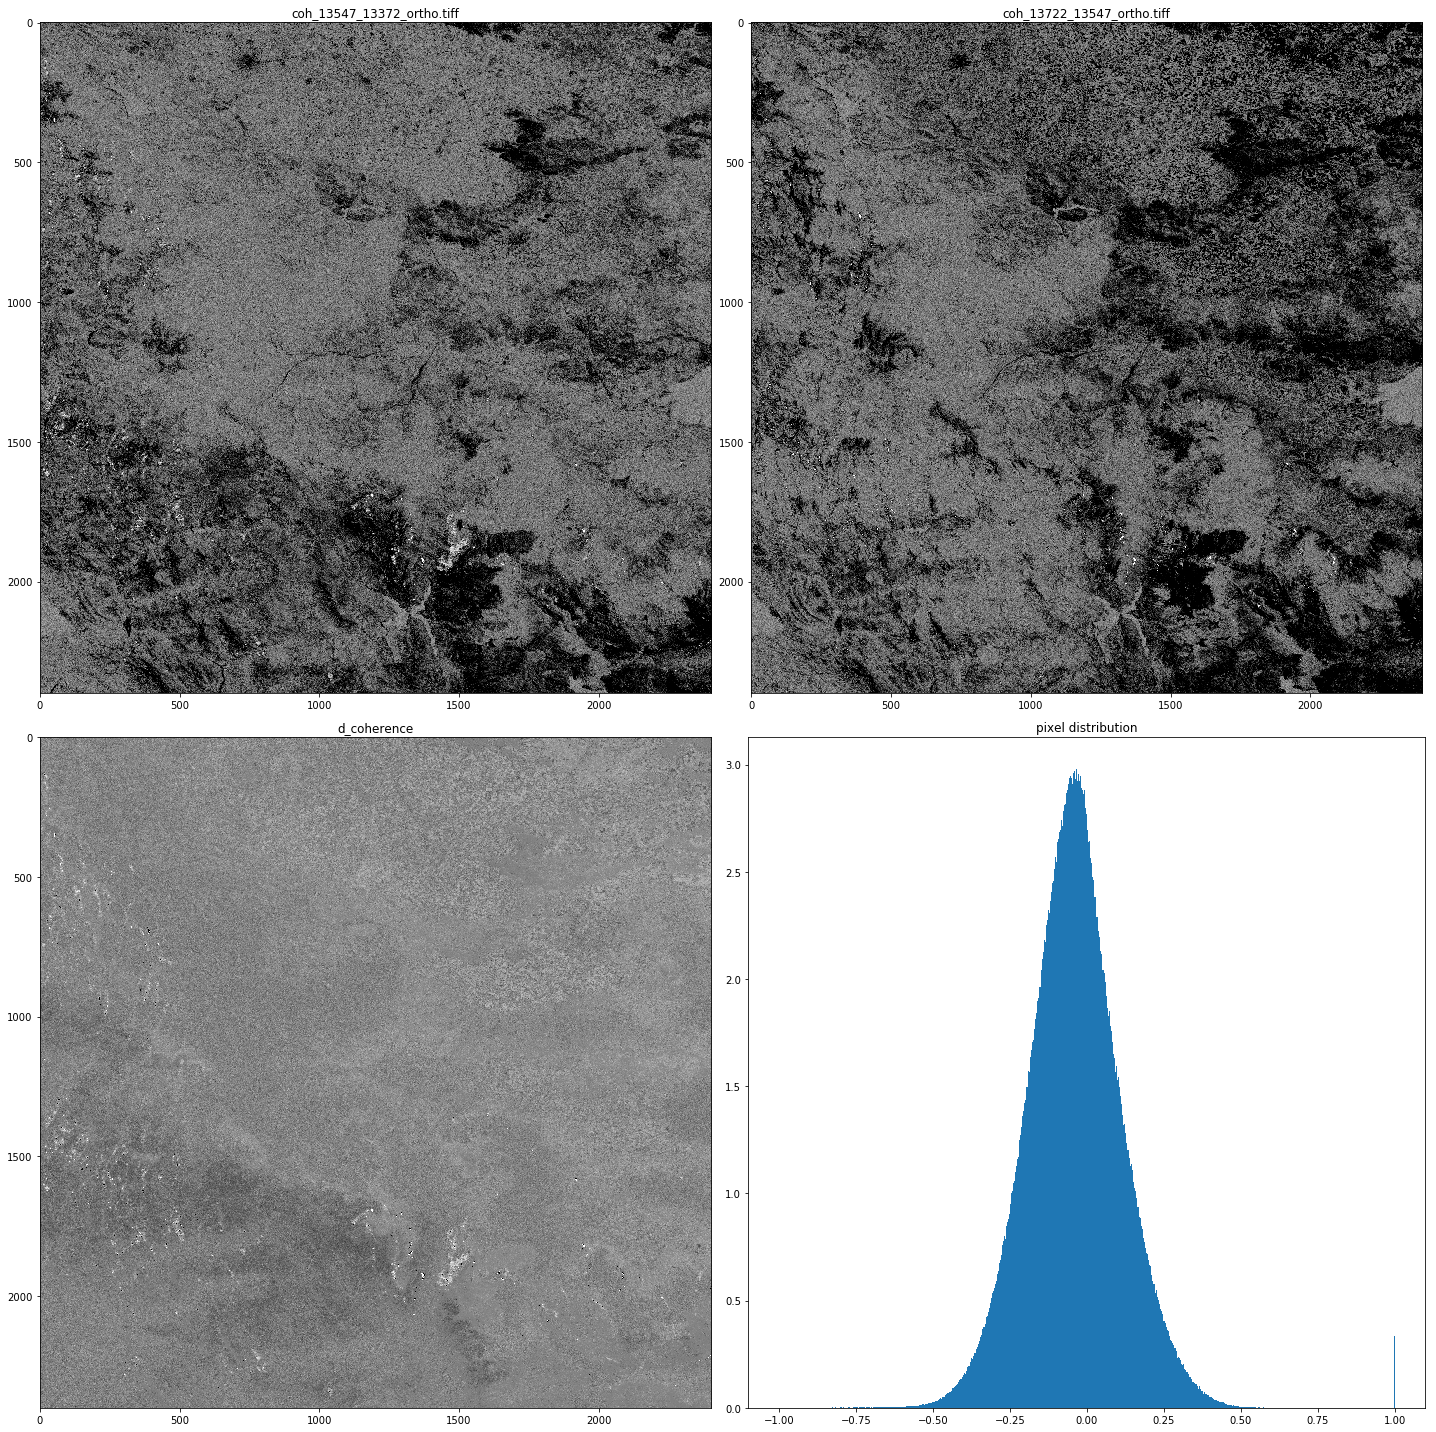

In [10]:


fig = plt.figure(figsize=(20,20))

i=1
for geotif in coherence_prds:
    
    ds = gdal.Open(geotif)
    band = ds.GetRasterBand(1)
    
    a=fig.add_subplot(2, 2, 0+i)
    imgplot = plt.imshow(band.ReadAsArray().astype(numpy.float),
                         cmap=plt.cm.binary, 
                         vmin=0, 
                         vmax = 200)
    
    a.set_title(geotif)
    i = i+1

    
ds = gdal.Open("d_coherence.tif")    
band = ds.GetRasterBand(1)   

band_data = band.ReadAsArray().astype(numpy.float)

a=fig.add_subplot(2, 2, 0+i) 
imgplot = plt.imshow(band_data, 
                     cmap=plt.cm.binary, 
                     vmin=-1, 
                     vmax = 1)
 
a.set_title('d_coherence')


i = i+1


band_data.shape = cols * rows
a=fig.add_subplot(2, 2, 0+i) 
imgplot = plt.hist(band_data, 
                   bins=2048, 
                   range=[-1, 1],
                   normed=True)

a.set_title("pixel distribution")

plt.tight_layout()
fig = plt.gcf()
plt.show()

fig.clf()
plt.close()